# ARMA

## 0.1 개요

- George Box, Gwilym Jenkins 제안한 시계열 모형
- 시계열 데이터는 (Trend + Cycle + Seasonality + Irregular) 성분에 있어 
  - 설명변수 설정이 용이하지 못하거나
  - {$Y_t$}에 대한 예측을 위하여(시계열 데이터 분석의 주요 목적) 설명변수에 대한 예측치($X_t$ )가 있어야 하는 문제가 있고 
  - 독립성 가정을 만족하지 못해 이 문제를 해결하는 어려움이 있어 회귀모형에 의한 분석보다는 관측치의 이전 관측치를 활용하는 방법이 제안
  
- ARIMA(Auto-Regressive Integrated Moving-Average) 모형은 시계열 데이터 {$Y_t$}의 과거치(previous observation) {$Y_{t-1}, Y_{t-2}, \dots$}가 설명변수인 AR과 과거 관측치가 설명하지 못하는 부분에 해당되는 오차항($e_{t-1}, e_{t-2}, \dots$ )들이 설명변수인 MA, 차분을 나타내는 integrate의 합성어이다.

AR 모형은 아래 가설에 의해 제안되었다.
- 과거의 패턴이 지속된다면 시계열 데이터 관측치 {$Y_t$}는 과거 관측치  {$Y_{t-1}, Y_{t-2}, \dots$}에 의해 예측할 수 있을 것이다.
- 어느 정도의 멀리 있는 과거 관측치까지 이용할 것인가? 그리고 멀어질수록 영향력을 줄어들 것이다. 이런 상황을 고려할 수 있는 가중치를 사용해야 하지 않을까?

Backshift Notation

$B(Y_t) = Y_{t−1},\, B^2(Y_t) = Y_{t-2}, \,\dots, B^p(Y_t) = Y_{t-p}$

## 0.2 상관함수 Correlation Function

자기상관함수 Auto Correlation Function (ACF)

- $\rho(j) = \large \frac{\gamma(j)}{\gamma(0)} = \frac{Cov(Y_t, Y_{t-j})}{VAR(Y_t)}$, $\gamma(j)$는 주기 j의 자기 공분산 (auto-covariance with lag j)
- 현재 관측값과 j기 이전 관측값들의 상관계수이다.
- $\rho(0)=1$ 주기 0인 상관계수는 현재 관측치 간 상관계수이므로 1이다.

부분자기상관함수 Partial Auto Correlation Function (PACF)
- 두 변수 (X, Y)의 상관관계를 시간의 효과를 제거한 후 구한 순수 상관관계
- $\rho_{XY,Z} = \large \frac{E(X-E(X|Z))E(Y-E(Y|Z))}{\sqrt{E(X-E(X|Z))^2E(Y-E(Y|Z))^2}}$, Z->X 회귀분석 잔차와 Z->Y 잔차의 상관계수


# 1.시계열 데이터

시계열(time series) 데이터는 관측치가 시간적 순서를 가지게 된다. 일정 시점에 조사된 데이터는 횡단(cross-sectional) 자료라 한다. ○○전자 주가, △△기업 월별 매출액, 소매물가지수, 실업률, 환율 등이 시계열 자료이다. {Y ;t 1,2,...,T}

(Page 2). 

## 1.1 분석목적 

- 가장 중요한 목적은 미래 값을 예측 : trend analysis, smoothing, decomposition, ARMA model 
- 시스템 시계열 데이터 이해와 특성 파악 : spectrum analysis, intervention analysis, transfer function analysis

## 1.2 방법 
- frequency domain : Fourier 분석에 기초, spectrum density function 
- time domain : 자기상관함수 이용, 관측값들의 시간적 변화 탐색

(Page 2). 

## 1. 3. 시계열 데이터 4 가지 component {Y ;t 1,2,..,T}

- 경향(Trend): 데이터가 증가(감소)하는 경향이 있는지 혹은 안정적인지 알 수 있다. 직선의 기울기가 있는가? 
- 주기(cycle): 일정한 주기(진폭)마다 유사한 변동이 반복된다. (sine, cosine 곡선) - 계절성(seasonality): 주별, 월별, 분기별, 년별 유사 패턴이 반복된다. 불규칙성(irregular): 일정한 패턴을 따르지 않는다. 

    $Y_t = Trend + Cycle + Seasonality + Irregular$

(Page 3).

## 1.3.1 시계열 형태 

### 1.3.1.1 white noise process 
- 평균이 0 이고 분산이 $\sigma^2$ 인 동일분포로부터 독립적으로(iid) 얻어진 시계열 데이터 {$Y_t$} 을 백색 잡음(white noise) process 라 한다. 백색 잡음 데이터의 평균 수준을 $\mu$ 라 하면 이 시계열 데이터의 모형은 $Y_t = \mu + e_t$ 라 쓸 수 있다. 만약 $Y_0 = \mu$ 라 하면 $Y_t = Y_0 + e_1 + e_2 + \dots + e_t $가 되며 {$Y_t$} 을 random walk process 라 한다. {$Y_t$} 는 동일한 분포를 가지며 서로 독립이라는 가정이다. 

### 1.3.1.2 stationary process 
- $F(y_{t_1}, y_{t_2}, \dots, y_{t_n}) = F(y_{t_{1 + k}}, y_{t_{2 + k}}, \dots, y_{t_{n + k}})$ 이면 시계열 데이터 {$Y_t$} 를 strongly stationary process(강한 정상성)이라 한다. 일정한 기간의 종속변수 결합밀도함수는 동일한 분포를 가진다는 것을 의미한다. 다음 조건을 만족하는 시계열 데이터 {$Y_t$}는 weakly stationary process(약한 정상성)라 정의한다. 
  - 평균이 일정하다. $E(Y_t) = \mu$ 
  - 분산이 존재하며 일정하다. $V(Y_t) = \gamma(0) < \infty$ 
  - 두 시점 사이의 자기 공분산(auto-correlation)은 시간의 차이에 의존한다.<p> 
      $COV(Y_t, Y_{t-j}) = COV(Y_s, Y_{s-j}) = \gamma(j), for \, j \neq s$

(Page 3). 

# 2. Time Plot

시계열 자료 {$Y_t ; t=1,2, \dots, T$} 는 자료가 시간적 순서를 가지므로 $Y$ 축은{$Y_t$} 값, $X$ 축은 시간이므로 하여 산점도를 그릴 수 있다. 이를 시간도표(time plot)이라 한다. 
 - 시계열 자료의 구조를 파악하는데 도움이 되며 시계열 분석의 시작이다. 
 - 시계열 데이터 4 가지 성분 진단 가능 : 시각적 도움 
   - 백색잡음 : $Y_t = e_t ~ N(0, \sigma^2)$
   - 정상성 시계열 : $F(y_{t_1}, y_{t_2}, \dots, y_{t_n}) = F(y_{t_{1 + k}}, y_{t_{2 + k}}, \dots, y_{t_{n + k}})$  
     $E(Y_t) = \mu$, $V(Y_t) = \gamma(0) < \infty$, $COV(Y_t, Y_{t-j}) = COV(Y_s, Y_{s-j}) = \gamma(j), for \, j \neq s$
 - econometrics (계량 경제) : 종속변수의 등분산 가정 체크

(Page 4).

In [1]:
PROC IMPORT DATAFILE="load_data2.xlsx" 
		    OUT=load_data2
		    DBMS=xlsx
		    REPLACE;
RUN;

SAS Connection established. Subprocess id is 1971



In [3]:
data load0;
    set load_data2;
    format yr 4.; format mm 2.; format dd 2.;
    format day date9.;
    
    yr    = substr(compress(load_date), 1, 4);
    mm    = substr(compress(load_date), 5, 2);
    dd    = substr(compress(load_date), 7, 2);
    day   = mdy(mm, dd, yr);
    week  = weekday(day);
    QTR   = QTR(day);
    month = month(day);
    log_y = log(real_load);
    sqrt_y = sqrt(real_load);
    drop mm dd;
run;

In [19]:
proc EXPAND data=load0 out=MA;
    convert real_load = MA7 / transform=(movave 7);
run;

# III. Moving average 이동평균법

자신의 m 개 관측치 평균으로 시계열 자료  {$Y_t$}의 패턴 인식 

가중치는 1/m 으로 동일하다. 

이를 이용하여 미래 값  {$Y_{t+1}$} 예측한다.

(Page 6)

## 3.1 M의 결정

일반적으로 주기를 m 으로 놓는다. 

주가의 경우 5 일 (단기), 20 일, 60 일(중기), 120 일(장기), … 이동평균을 주로 사용한다

(Page 6). 

## 3.2 이동평균법 특징 

m 이 클수록 주기의 영향은 없어지고 직선에 가까워짐, Trend(경향)을 보는데 활용 

작은 m 은 단기 예측, 큰 주기 m 은 장기 예측에 사용 

주가 예측에 가장 많이 이용, 그러나 예측보다는 (실제 예측 가능은 다음 1 기) 추세분석에 가까움

(Page 6).


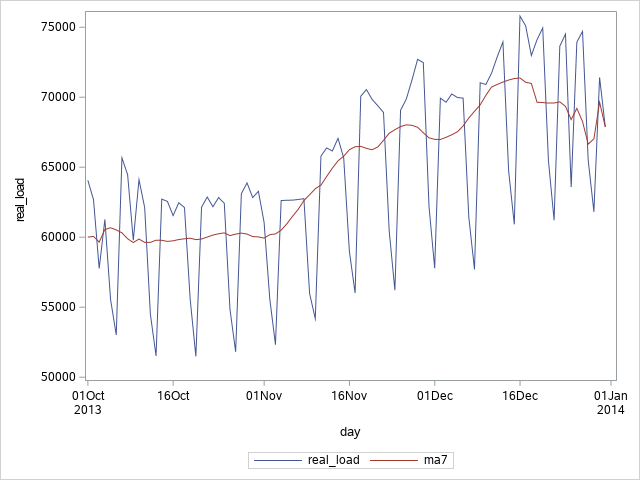

In [4]:
proc sgplot data = load0;
	series x =day y=real_load;
	series x =day y=ma7;
run;

# IV. 지수평활법 개요

- 모든 관측치에 동일한 가중치를 부여하는 이동평균법과는 달리 최근 관측치에 높은 가중치, 멀어질수록 지수적으로 가중치 값 감소 
- 이동평균법(동일한 가중치로 평활하여 계절성분, 불규칙성 제거하여 추세 명확하게)은 분해법에서 계절조정을 하는데 주로 사용하며, 지수평활법은 예측에 사용

(Page 8). 

## 4.1 Simple Exponentially Smoothing 단순지수 평활법


- 단순지수평활법은 경향이나 계절성이 없을 때 사용한다. (가중평균 weighted mean) 

- 평활 가중치 값의 설정이 다소 주관적이나, 계산이 간편함 

### 4.1.1 상수모형 

$\large Y_t = \beta_0 + e_t$ : 사인 곡선, 시간 추세 없음 

### 4.1.2 시간 변동 모형 

$\large Y_t = \beta_{0, t} + e_t $

Locally 동일한 평균을 가지나 globally 평균 차이 보임 

### 4.1.3 예측치(추정치) 및 추정 오차 

다음 차기 $Y_{t+1}$의 예측치는 $S_t$ 에 의해 추정된다. 

$\large \hat{Y}_{t+1} = S_t = wY_t + (1-w)S_{t-1}$

 - a. $S_t$ 는 $t$ 시점에서 평활 된 값이고 가중치 $0 < w $ 1 $
 - b. 이전 값이 계속 필요한 것이 아니라 최근 값과 평활 값 만으로 예측이 갱신 
 - c. 추정오차 : $e_t = Y_t - \hat{Y}_t$
 - d. 다음 차기 하나만 예측 가능 
 
위 식을 시계열 데이터 {$Y_t$} 표시하면 다음과 같으므로 가중치가 지수적으로 감소하여 이를 지수평활법이라 한다. 
 
 $\large \hat{Y}_{t+1} = S_t = wY_t + w(1-w)Y_{t-1} + w(1-w)^2Y_{t-2} + \dots$ : 가중치의 합은 1이다
 

### 4.1.4 단순지수 평활 통계량 $S_t$ 활용

 1) $Y_{t+1}$ 예측치 <P>
 2) $\beta_{0, t}$의 추정치 <P>
 3) $Y_{t+1}$ 예측치인 $S_t$의 신뢰구간은 가중최소제곱법의 특수한 경우가 지수평활법 예측이므로

### 4.1.5 초기치 평활값 선택

초기평활 값 $\large S_0 = \frac{\sum_{i=1}^Ty_i}{T}$이고 일반적으로 $T = 6$ 혹은 $\large T = \frac{n}{2}$ 을 사용한다.



### 4.1.6가중치 결정 

이제 가중치를 결정하는 문제를 생각해 보자. 일반적으로 지수평활법은 현재에 가까운 관측치에 높은 가중치를 주기 위하여 0.05 에서 0.3 사이의 값을 준다. (다른 측면에서 보면 $\mu$ 가 시간에 따른 변화가 느리기 때문이다) 그럼 어떤 값이 가장 적절할까?



### 4.1.7 가중치 범위

클수록 최근 관측치 영향이 크다. 

일반적으로 0.05 와 0.3 사이의 값 

$SAS 의 \,default 값: \large1-0.8^{(1/trend)}$, Montgomery and Johnson (1976) 

가중치 선택 : 모형 적합 정도를 나타내는 통계량을 이용하여 trial and error 방법으로 어떤 가중치가 좋은가를 판단하는 기준은 많으나 가장 많이 사용되는 것은 다음과 같다.

***최적 ARIMA*** : 데이터에 ARIMA(0, 1, 1) 모형을 적합시켜 계산하는 기본 가중치를 사용 주관적 : 가중치 값이 크면 최근 관측값 반영이 크므로 예측 변동이 심하며, 가중치 값이 작으면 예측 변동이 완만하다. 이동평균법 $M = \large \frac{2-w}{w}$ (m=7 인 경우 0.25 가 적절)

(Page 9). 

### 4.1.8 시계열 모형 적합도 

관측치 $Y_t$ 와 예측치 $\hat{Y}_t$ 차이로 측정, 작을수록 적합 정도 높음

- MAPE (Mean Absolute Percent Error): 평균 절대 퍼센트 오차 
- MAD (Mean Absolute Deviation): 평균 절대편차 
- MSD (Mean Squared Deviation): 평균 제곱오차 
- SSE(Sum of Squared Error): 오차 제곱 합 
- MSE(Mean Square prediction Error): 평균 오차 자승

(Page 10). 


![TS_formula](image/TS_formula.png)

In [6]:
title '단순지수평활법';
proc FORECAST data=load0 lead=7 method=expo trend=1 out=pred OUTEST=est outfull;
    var real_load;
    id day;
run;

In [ ]:
proc print data=est; run;
proc print data=pred; run;

> - lead=7 : 미래 7 개 관측값을 예측 / trend=1 : 단순 지수평활법 
> - out=pred : 예측결과를 저장하는 SAS 이름, outfull 의 의미는 현재 주기 관측값도 예측하라는 의미 / outset=est : 추정 내용, 모형 적합도 관련 내용 저장 
> - weight 옵션을 사용하지 않는 경우 $1-0.8^{(1/trend)}$ 사용 
> - 단순지수 평활법은 lead=1 까지만 예측 가능, 그 이후에는 lead=1 의 관측치가 없음



In [ ]:
title '예측값 시간도표';
proc gplot data = pred;
	plot real_load * day = _type_;
	symbol1 i=join v=dot; /* for _type_ =ACTUAL */
	symbol2 i=join v=circle; /* for _type_ = FORECAST */
run;


> - symbol 문장은 시간 도표의 점들의 속성 지정, i=interpolate (보간법) 옵션으로 join 은 직선 연결이고 곡선 연결은 spline, 연결을 원치 않으면 none 
> - v=value 점에 대한 것으로 circle 은 동그라미, dot 는 점

(Page 11). 

### 4.1.9 Holt Winters Exponential Smoothing

- Simple Exponential : $\large S_t = \alpha Y_t + (1-\alpha)S_{t-1}$ <p>

- Double Exponential : trend only $\large G_t = \beta (S_t - S_{t-1}) + (1-\beta)G_{t-1}$  <p>

- Triple Exponential : trend and seasonality $\large R_t = \gamma(Y_t - R_t) + (1- \gamma)R_{t-L}$ <p>

  - ***승법모형***, multiplicative 사용 : 계절성이 추세와 함께 변동이 있을 때
  - ***가법모형***,  additive 사용 : 계절성이 추세에 관계없이 일정할 때

(Page 13). 

## 4.2 Double Exponentially Smoothing
